In [43]:
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')

plt.rcParams['figure.dpi'] = 300

[nltk_data] Downloading package punkt to C:\Users\Asif
[nltk_data]     Sayyed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Asif
[nltk_data]     Sayyed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
corpus = (""""Dear Students,

We are thrilled to announce an exclusive opportunity for talented students to join Flipkart, a leading e-commerce giant!

Flipkart is hosting its flagship challenge, Flipkart GRiD 6.0, seeking passionate and skilled individuals for full-time SDE roles and internship positions.

Here's what awaits you:

Full-Time SDE Roles:
The competitive salary package of INR 32 LPA.
Opportunity to contribute to cutting-edge projects and technologies that drive e-commerce innovation
Be part of a dynamic and collaborative team environment.

Internships:
A lucrative stipend of INR 1 lakh per month.
Gain invaluable hands-on experience working on real-world engineering challenges.
Build your skills and network within a leading technology company.

Eligibility:
Open to all students enrolled in batches 2025, 2026, 2027, and 2028.

How to Apply:
Showcase your talent and problem-solving skills by participating in the Flipkart GRiD 6.0 challenge
Apply through the application link: https://bit.ly/flipkartgrid6

Don't miss this chance! This is an exceptional opportunity to kick-start your career with a leading e-commerce company and contribute to the future of online shopping.

We encourage you to seize this exciting opportunity. We believe in your potential and wish you the very best in your endeavors!

Thanks and Regards
Rahul Jadhav
SDBI""")

In [27]:
# converting text to lowercase
corpus = corpus.lower()
# df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x) # for dataframe
print(corpus)

"dear students,

we are thrilled to announce an exclusive opportunity for talented students to join flipkart, a leading e-commerce giant!

flipkart is hosting its flagship challenge, flipkart grid 6.0, seeking passionate and skilled individuals for full-time sde roles and internship positions.

here's what awaits you:

full-time sde roles:
the competitive salary package of inr 32 lpa.
opportunity to contribute to cutting-edge projects and technologies that drive e-commerce innovation
be part of a dynamic and collaborative team environment.

internships:
a lucrative stipend of inr 1 lakh per month.
gain invaluable hands-on experience working on real-world engineering challenges.
build your skills and network within a leading technology company.

eligibility:
open to all students enrolled in batches 2025, 2026, 2027, and 2028.

how to apply:
showcase your talent and problem-solving skills by participating in the flipkart grid 6.0 challenge
apply through the application link: https://bit.

In [28]:
# removing non-textual characters
pattern = re.compile(r'[^\w\s]')
corpus = pattern.sub('', corpus)
print(corpus)

dear students

we are thrilled to announce an exclusive opportunity for talented students to join flipkart a leading ecommerce giant

flipkart is hosting its flagship challenge flipkart grid 60 seeking passionate and skilled individuals for fulltime sde roles and internship positions

heres what awaits you

fulltime sde roles
the competitive salary package of inr 32 lpa
opportunity to contribute to cuttingedge projects and technologies that drive ecommerce innovation
be part of a dynamic and collaborative team environment

internships
a lucrative stipend of inr 1 lakh per month
gain invaluable handson experience working on realworld engineering challenges
build your skills and network within a leading technology company

eligibility
open to all students enrolled in batches 2025 2026 2027 and 2028

how to apply
showcase your talent and problemsolving skills by participating in the flipkart grid 60 challenge
apply through the application link httpsbitlyflipkartgrid6

dont miss this chanc

In [29]:
# removing digits
pattern = re.compile(r'\d')
corpus = pattern.sub('', corpus)
print(corpus)

dear students

we are thrilled to announce an exclusive opportunity for talented students to join flipkart a leading ecommerce giant

flipkart is hosting its flagship challenge flipkart grid  seeking passionate and skilled individuals for fulltime sde roles and internship positions

heres what awaits you

fulltime sde roles
the competitive salary package of inr  lpa
opportunity to contribute to cuttingedge projects and technologies that drive ecommerce innovation
be part of a dynamic and collaborative team environment

internships
a lucrative stipend of inr  lakh per month
gain invaluable handson experience working on realworld engineering challenges
build your skills and network within a leading technology company

eligibility
open to all students enrolled in batches    and 

how to apply
showcase your talent and problemsolving skills by participating in the flipkart grid  challenge
apply through the application link httpsbitlyflipkartgrid

dont miss this chance this is an exceptional

In [30]:
# tokenization
tokens = corpus.split()
print(tokens)

['dear', 'students', 'we', 'are', 'thrilled', 'to', 'announce', 'an', 'exclusive', 'opportunity', 'for', 'talented', 'students', 'to', 'join', 'flipkart', 'a', 'leading', 'ecommerce', 'giant', 'flipkart', 'is', 'hosting', 'its', 'flagship', 'challenge', 'flipkart', 'grid', 'seeking', 'passionate', 'and', 'skilled', 'individuals', 'for', 'fulltime', 'sde', 'roles', 'and', 'internship', 'positions', 'heres', 'what', 'awaits', 'you', 'fulltime', 'sde', 'roles', 'the', 'competitive', 'salary', 'package', 'of', 'inr', 'lpa', 'opportunity', 'to', 'contribute', 'to', 'cuttingedge', 'projects', 'and', 'technologies', 'that', 'drive', 'ecommerce', 'innovation', 'be', 'part', 'of', 'a', 'dynamic', 'and', 'collaborative', 'team', 'environment', 'internships', 'a', 'lucrative', 'stipend', 'of', 'inr', 'lakh', 'per', 'month', 'gain', 'invaluable', 'handson', 'experience', 'working', 'on', 'realworld', 'engineering', 'challenges', 'build', 'your', 'skills', 'and', 'network', 'within', 'a', 'leading'

In [31]:
stop_words = set(stopwords.words('english'))
words = [word for word in tokens if word not in stop_words and word.isalnum()]
print(words)

['dear', 'students', 'thrilled', 'announce', 'exclusive', 'opportunity', 'talented', 'students', 'join', 'flipkart', 'leading', 'ecommerce', 'giant', 'flipkart', 'hosting', 'flagship', 'challenge', 'flipkart', 'grid', 'seeking', 'passionate', 'skilled', 'individuals', 'fulltime', 'sde', 'roles', 'internship', 'positions', 'heres', 'awaits', 'fulltime', 'sde', 'roles', 'competitive', 'salary', 'package', 'inr', 'lpa', 'opportunity', 'contribute', 'cuttingedge', 'projects', 'technologies', 'drive', 'ecommerce', 'innovation', 'part', 'dynamic', 'collaborative', 'team', 'environment', 'internships', 'lucrative', 'stipend', 'inr', 'lakh', 'per', 'month', 'gain', 'invaluable', 'handson', 'experience', 'working', 'realworld', 'engineering', 'challenges', 'build', 'skills', 'network', 'within', 'leading', 'technology', 'company', 'eligibility', 'open', 'students', 'enrolled', 'batches', 'apply', 'showcase', 'talent', 'problemsolving', 'skills', 'participating', 'flipkart', 'grid', 'challenge',

In [35]:
word_frequency = Counter(words)

In [40]:
# calculating work frequency
for word, frequency in word_frequency.most_common():
    print(f'{word}:{frequency}')

opportunity:4
flipkart:4
students:3
leading:3
ecommerce:3
challenge:2
grid:2
fulltime:2
sde:2
roles:2
inr:2
contribute:2
skills:2
company:2
apply:2
dear:1
thrilled:1
announce:1
exclusive:1
talented:1
join:1
giant:1
hosting:1
flagship:1
seeking:1
passionate:1
skilled:1
individuals:1
internship:1
positions:1
heres:1
awaits:1
competitive:1
salary:1
package:1
lpa:1
cuttingedge:1
projects:1
technologies:1
drive:1
innovation:1
part:1
dynamic:1
collaborative:1
team:1
environment:1
internships:1
lucrative:1
stipend:1
lakh:1
per:1
month:1
gain:1
invaluable:1
handson:1
experience:1
working:1
realworld:1
engineering:1
challenges:1
build:1
network:1
within:1
technology:1
eligibility:1
open:1
enrolled:1
batches:1
showcase:1
talent:1
problemsolving:1
participating:1
application:1
link:1
httpsbitlyflipkartgrid:1
dont:1
miss:1
chance:1
exceptional:1
kickstart:1
career:1
future:1
online:1
shopping:1
encourage:1
seize:1
exciting:1
believe:1
potential:1
wish:1
best:1
endeavors:1
thanks:1
regards:1
rahul:

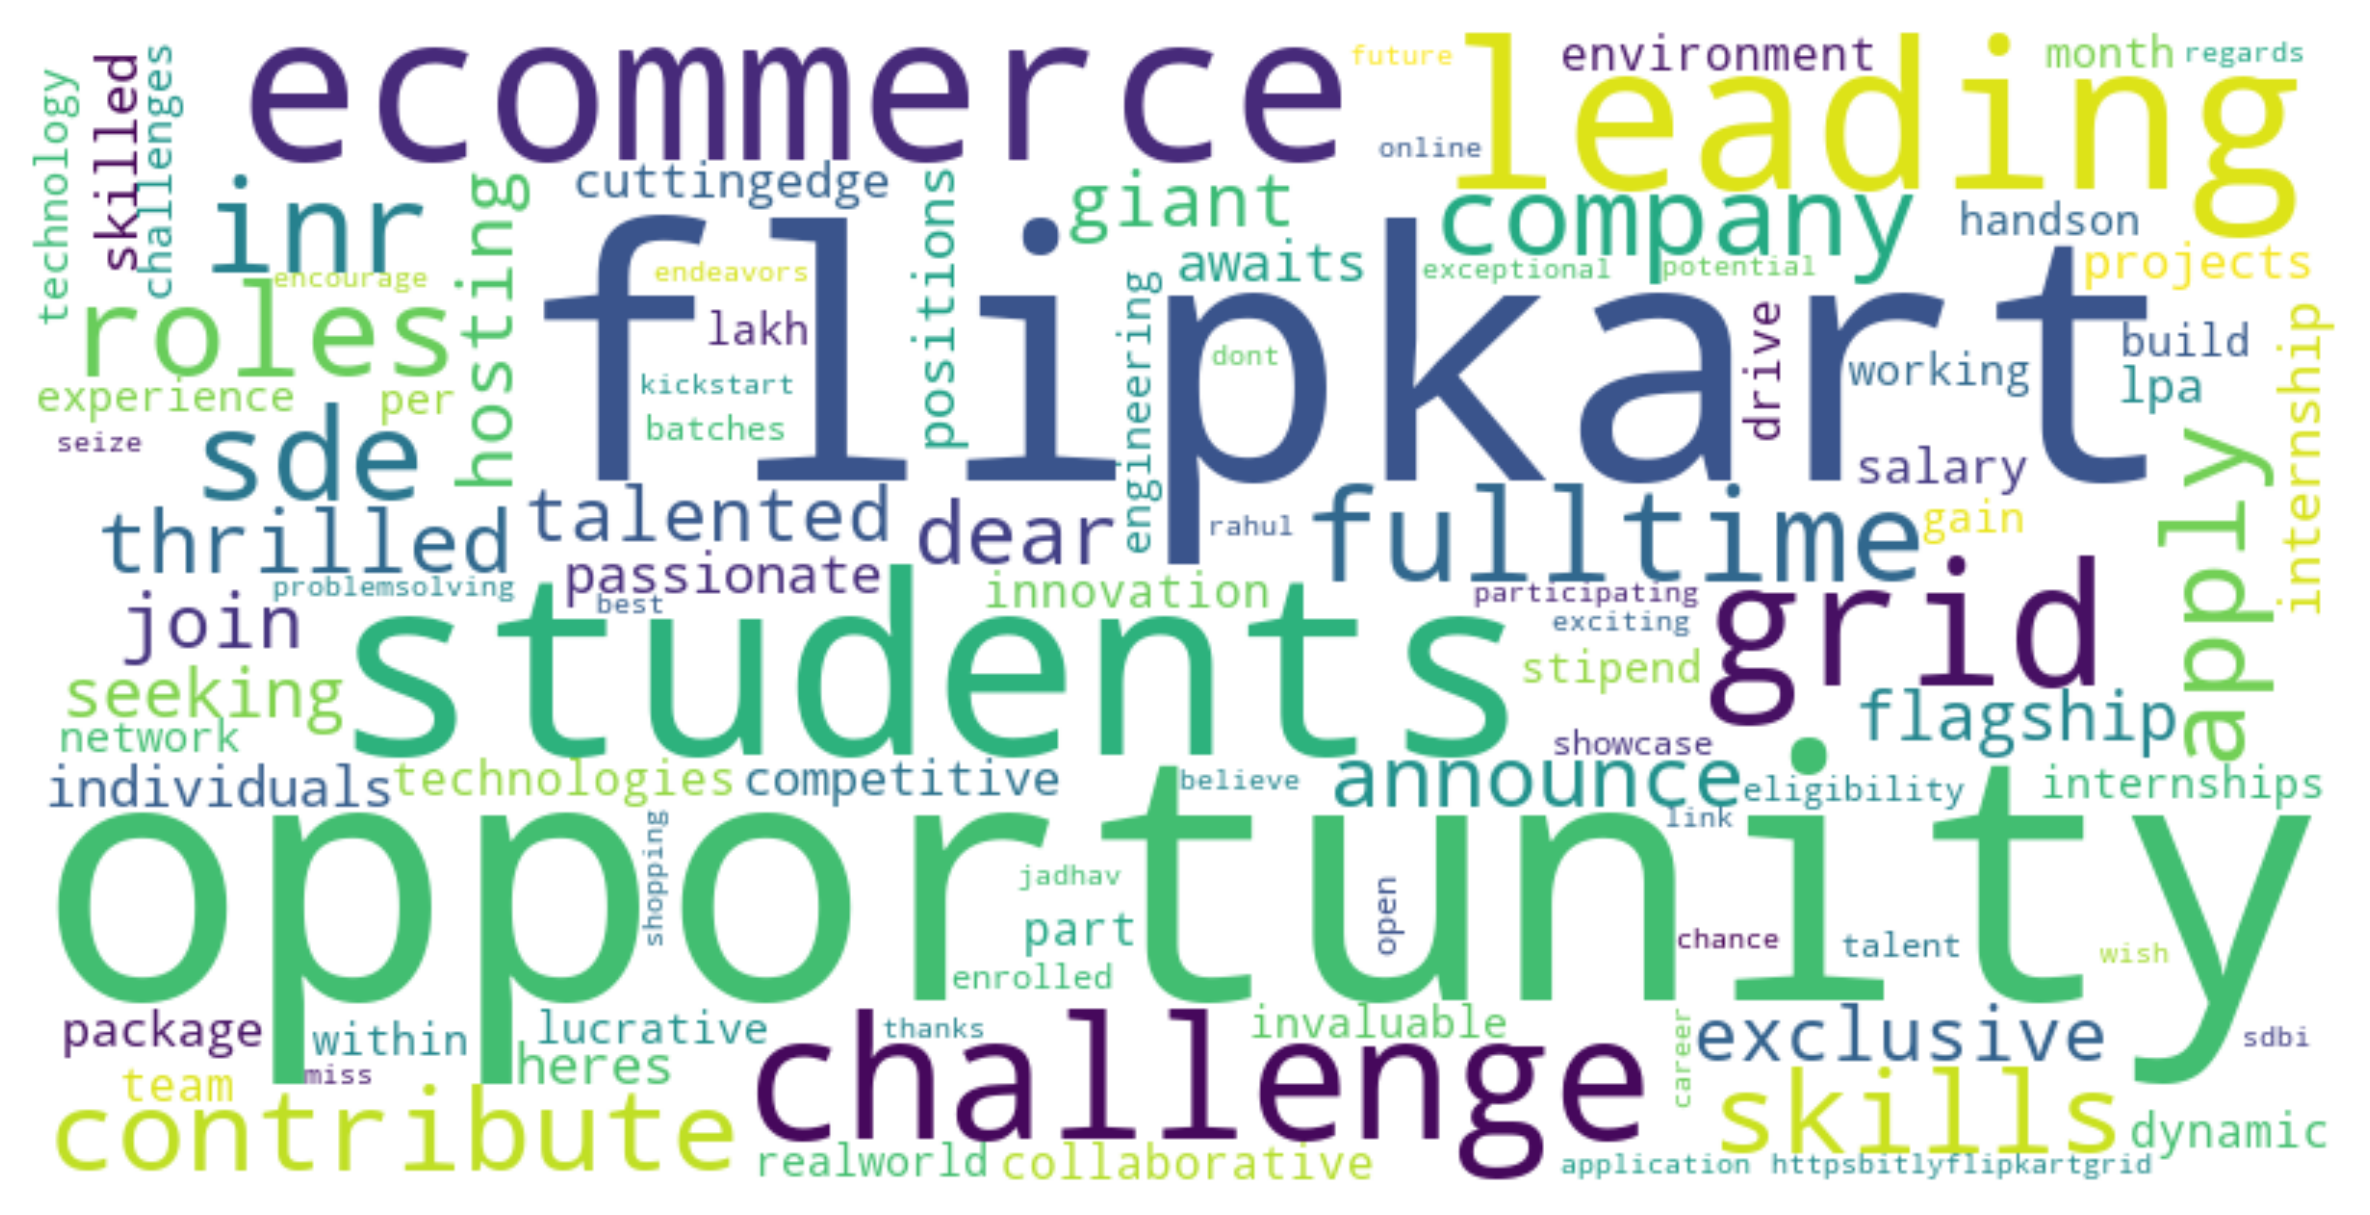

In [45]:
# creating word cloud using bilinear interpolation
word_cloud = WordCloud(width=800, height=400,background_color='white').generate_from_frequencies(word_frequency)
plt.figure(figsize=(10,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

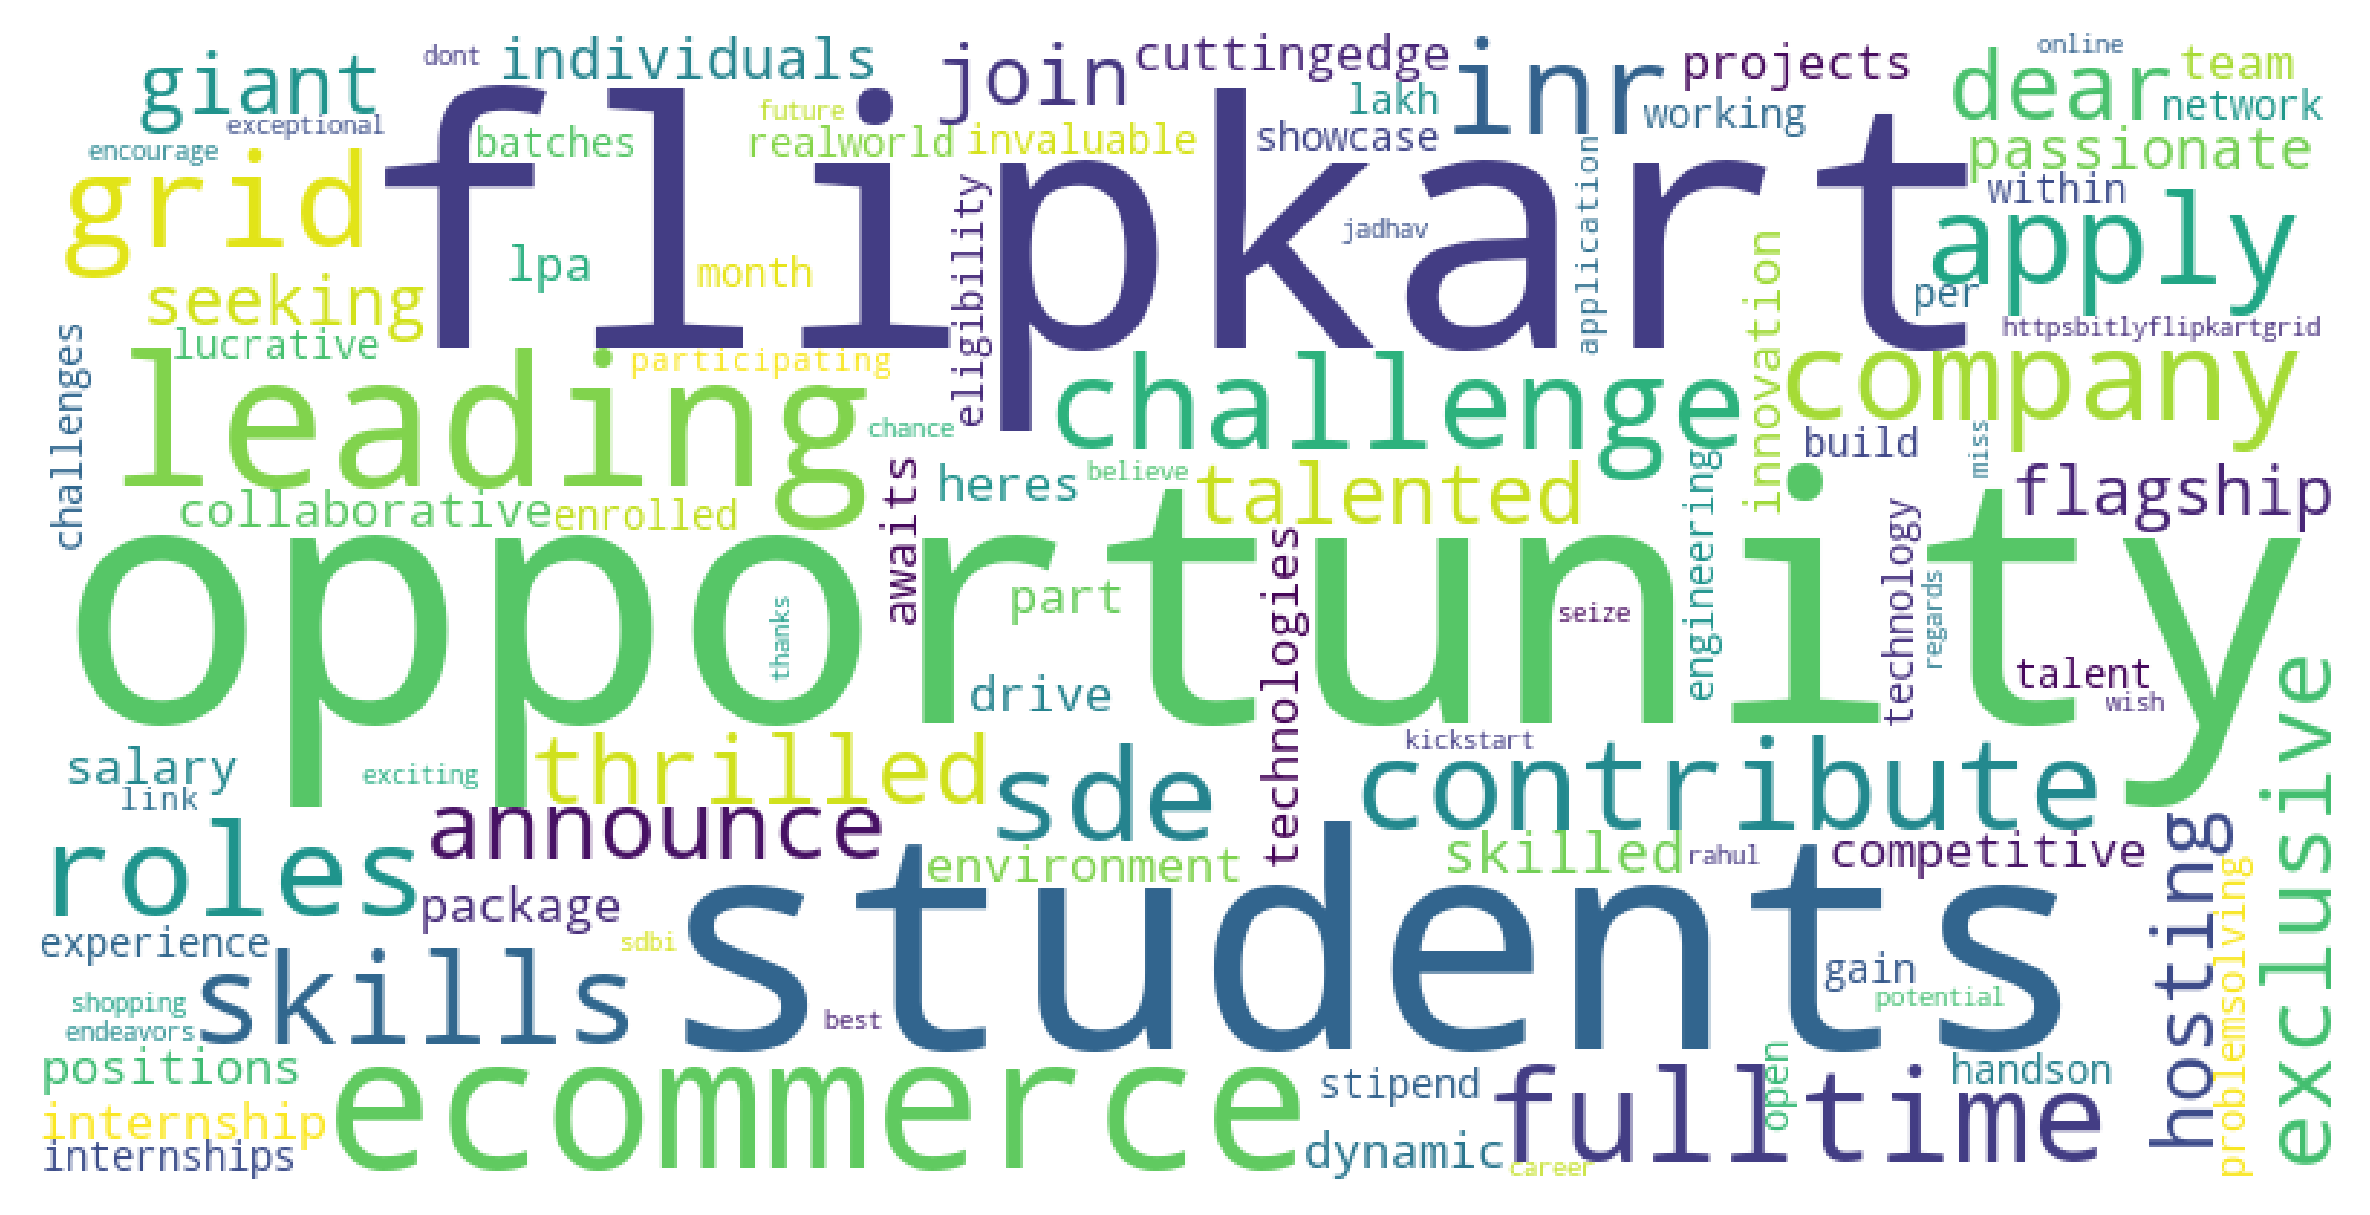

In [46]:
# creating word cloud using nearest interpolation
word_cloud = WordCloud(width=800, height=400,background_color='white').generate_from_frequencies(word_frequency)
plt.figure(figsize=(10,5))
plt.imshow(word_cloud, interpolation='nearest')
plt.axis('off')
plt.show()

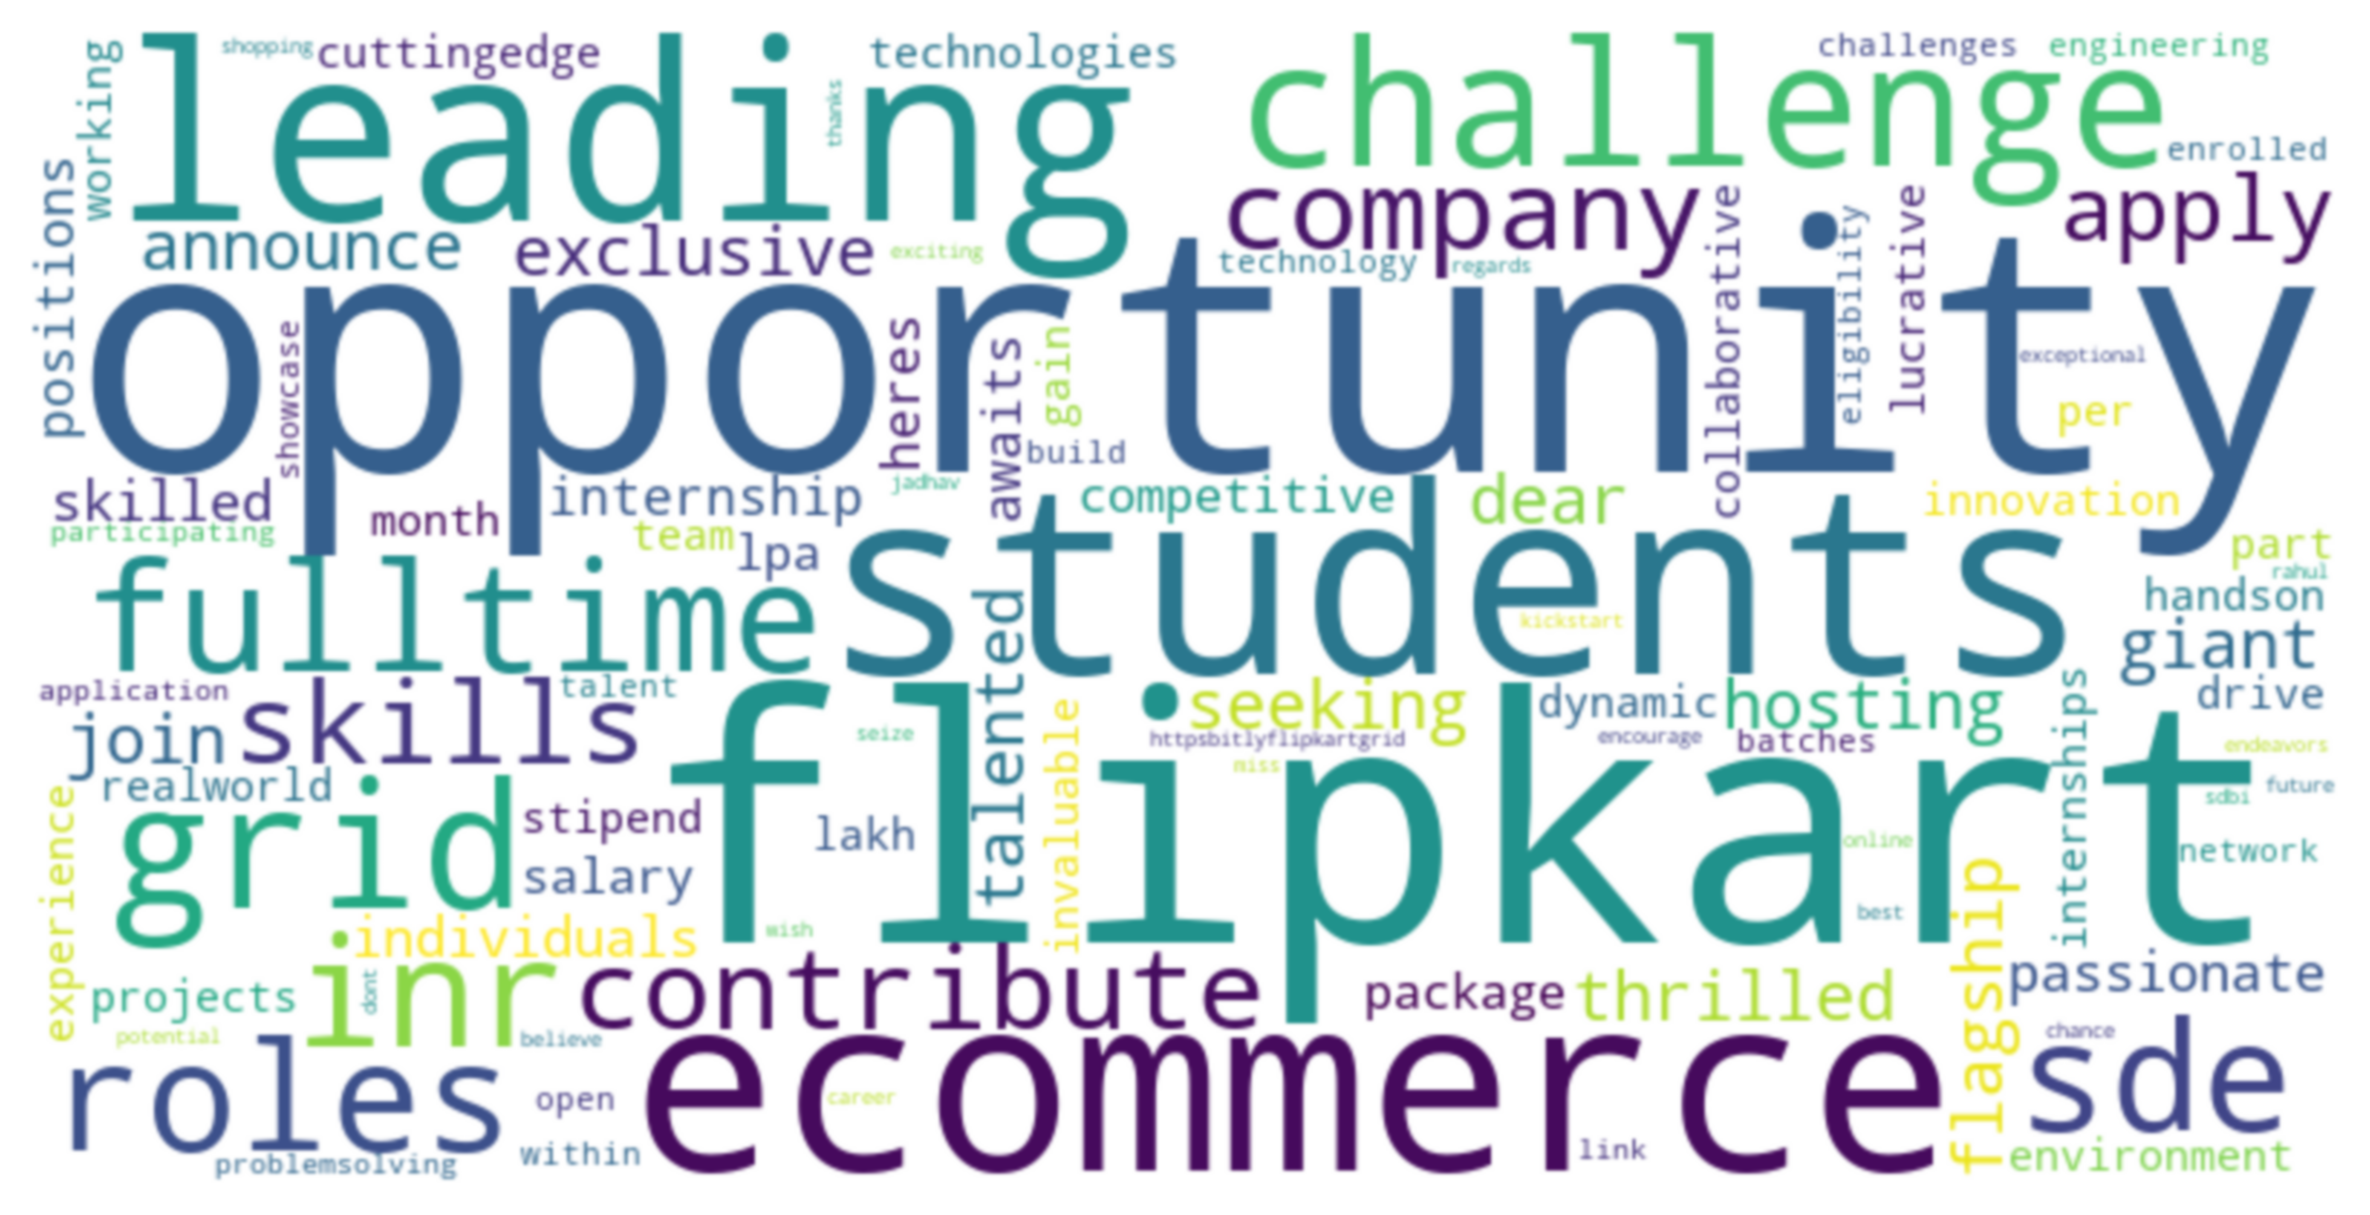

In [47]:
# creating word cloud using bicubic interpolation
word_cloud = WordCloud(width=800, height=400,background_color='white').generate_from_frequencies(word_frequency)
plt.figure(figsize=(10,5))
plt.imshow(word_cloud, interpolation='bicubic')
plt.axis('off')
plt.show()